In [1]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, pandas as pd

In [2]:
from pylift import TransformedOutcome
from pylift.generate_data import dgp

# Generate simulated data

In [3]:
df = dgp(N = 10000, discrete_outcome=True, seed = 1)

In [4]:
df.head(10)

,0,1,2,Treatment,Outcome
0,0.146756,0.092339,0.186260,0.0,1.0
1,0.345561,0.396767,0.538817,1.0,1.0
2,0.419195,0.685220,0.204452,0.0,1.0
3,0.878117,0.027388,0.670468,1.0,1.0
4,0.417305,0.558690,0.140387,0.0,1.0
5,0.198101,0.800745,0.968262,1.0,1.0
6,0.313424,0.692323,0.876389,1.0,1.0
7,0.894607,0.085044,0.039055,1.0,1.0
8,0.169830,0.878143,0.098347,1.0,1.0
9,0.421108,0.957890,0.533165,1.0,1.0


In [7]:
up = TransformedOutcome(
    df, 
    col_treatment = 'Treatment',
    col_outcome = "Outcome",
    stratify = df['Treatment']
)

<AxesSubplot:xlabel='NIV', ylabel='Features'>

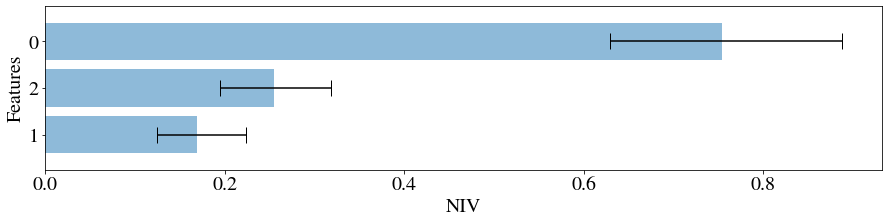

In [8]:
# Net information value EDA of features.
# Suspect that it spltis into train and test, and computes NIV for each feature based on training data on testing data
# Error bars are based on multiple (n_iter) splits of train vs test split
np.random.seed(0)
up.NIV()

<AxesSubplot:title={'center':'NWOE by bin for 2'}, xlabel='Bin Interval'>

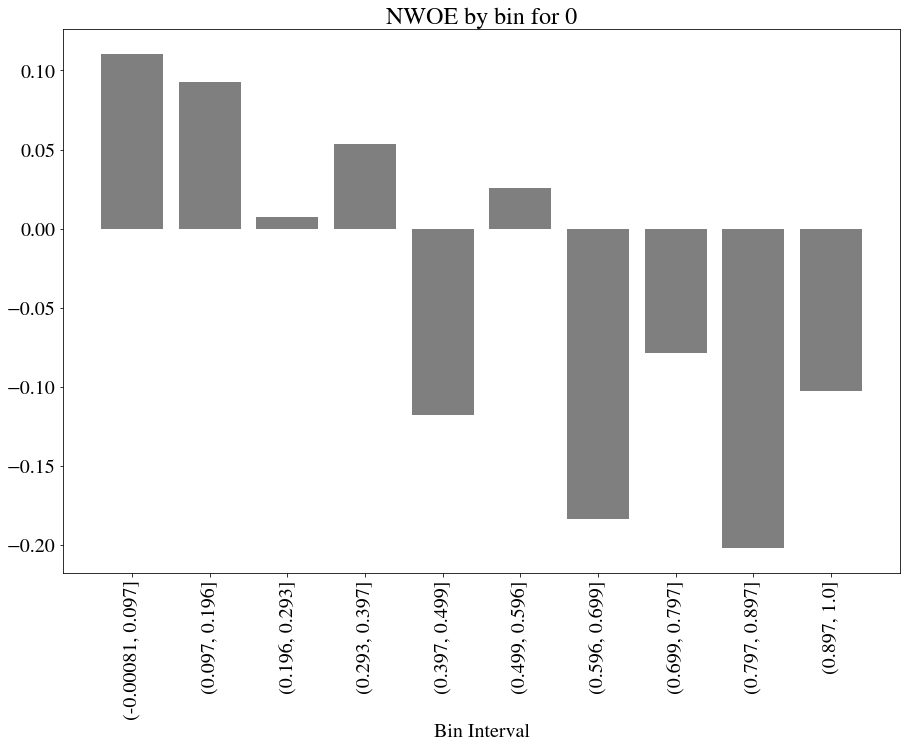

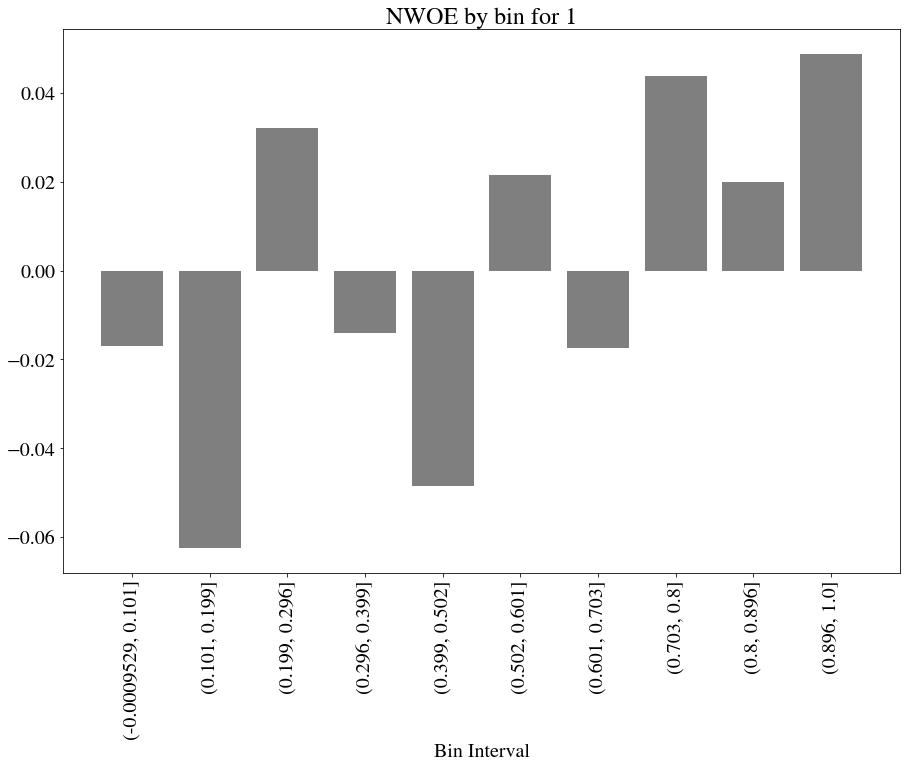

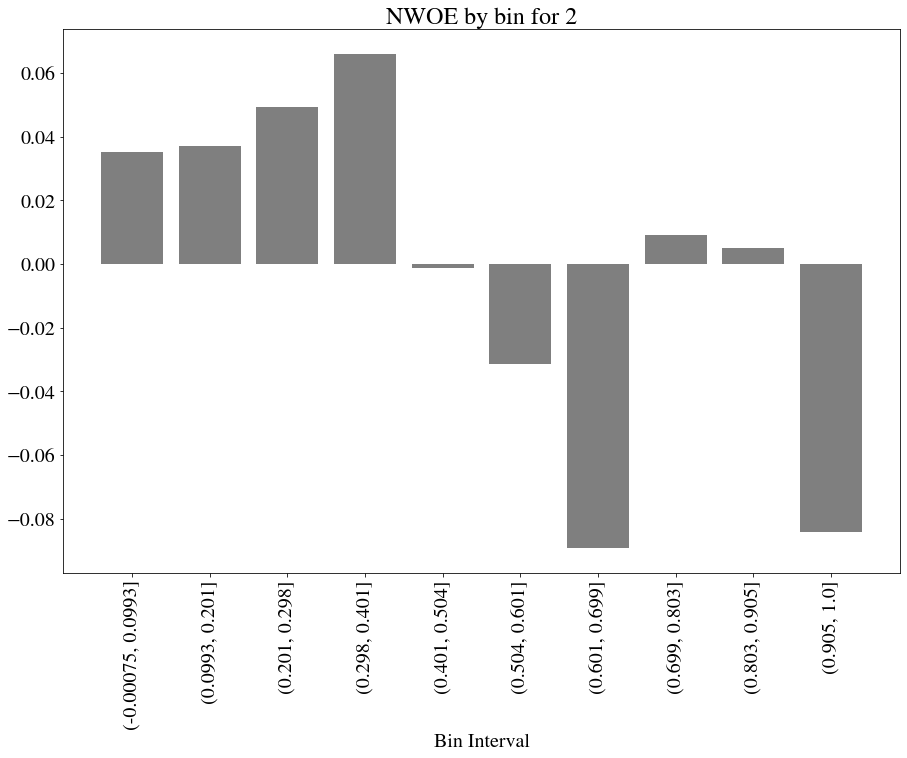

In [9]:
# Create plots for each feature

up.NWOE()

In [10]:
up.NIV_dict

{0: 0.7535806664416889, 1: 0.1686639159543357, 2: 0.2550425397532284}

In [11]:
up.randomized_search(n_iter = 20, n_jobs = 10, random_state = 1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs...
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      

In [12]:
up.rand_search_.best_params_

{'colsample_bytree': 0.3666356392973914,
 'gamma': 5.358964059155116,
 'max_depth': 8,
 'min_child_weight': 3,
 'n_estimators': 86,
 'subsample': 0.3208609507276753}

In [13]:
up.fit(**up.rand_search_.best_params_)

<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

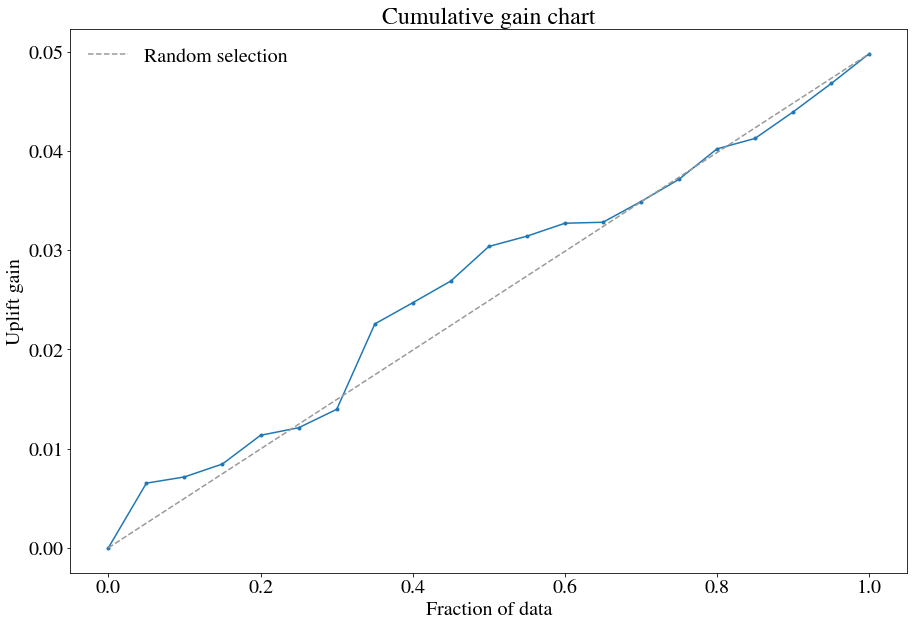

In [14]:
up.plot()

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Treatment balance curve'}, xlabel='Fraction of data', ylabel='Treatment size / (treatment size + control size)'>

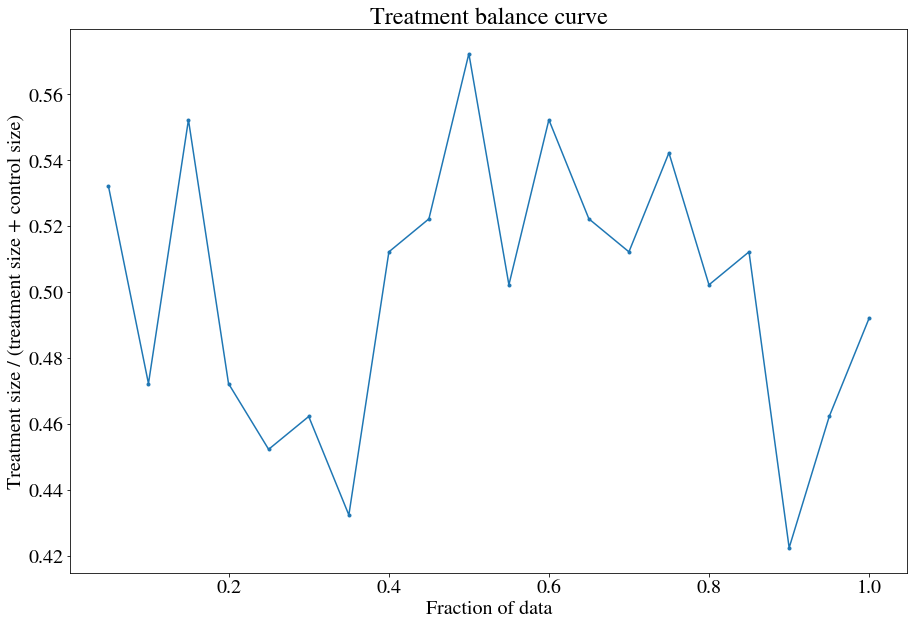

In [15]:
up.plot(plot_type = 'balance')

In [16]:
up.shuffle_fit(params = up.rand_search_.best_params_, nthread = 30, iterations = 5)

Seed 0 finished.
Seed 1 finished.
Seed 2 finished.
Seed 3 finished.
Seed 4 finished.


{0: <pylift.methods.derivatives.TransformedOutcome at 0x7f2eec109be0>,
 1: <pylift.methods.derivatives.TransformedOutcome at 0x7f2eec158be0>,
 2: <pylift.methods.derivatives.TransformedOutcome at 0x7f2eeb78d4e0>,
 3: <pylift.methods.derivatives.TransformedOutcome at 0x7f2eebd9bf28>,
 4: <pylift.methods.derivatives.TransformedOutcome at 0x7f2eeb765c88>}

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

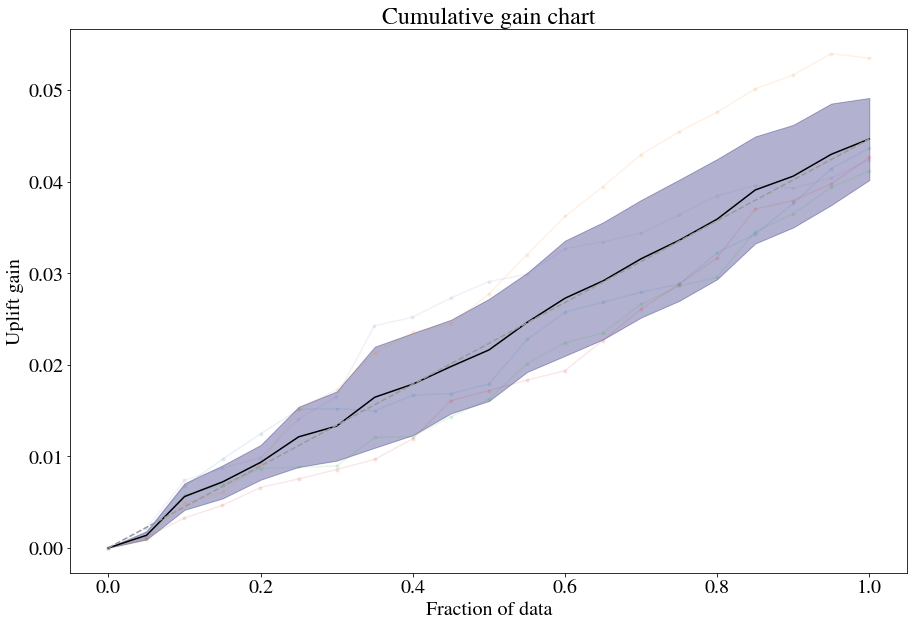

In [17]:
t

In [18]:
up.noise_fit()

<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

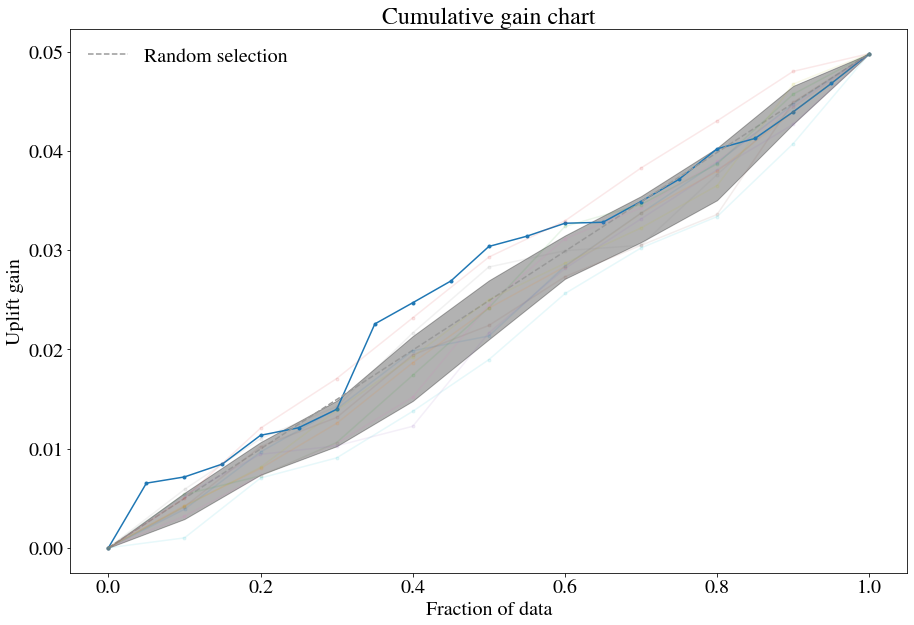

In [19]:
up.plot(show_noise_fits = True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Adjusted Qini curve'}, xlabel='Fraction of data', ylabel='Uplift gain'>

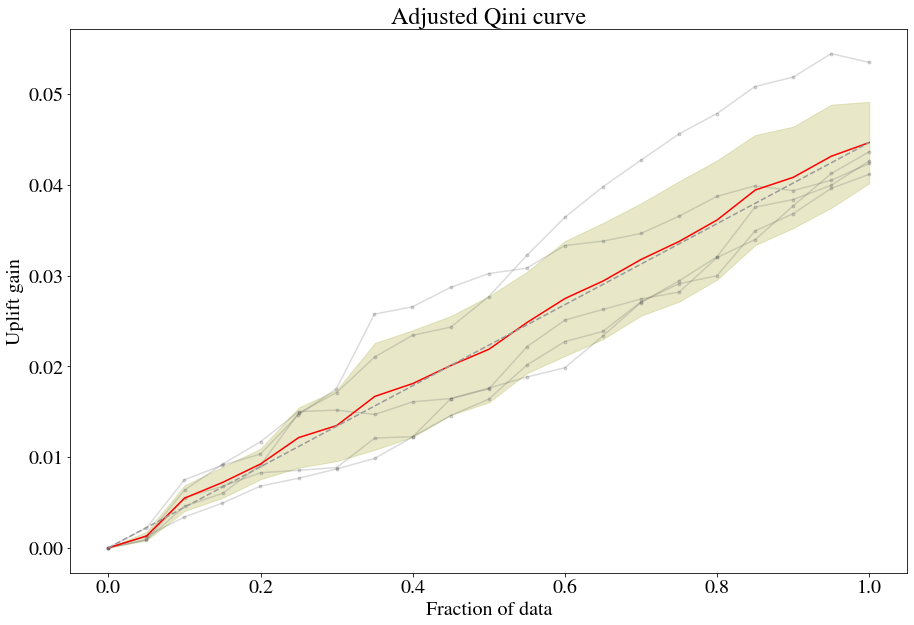

In [20]:
up.plot(
    plot_type = 'aqini',
    show_shuffle_fits = True,
    show_random_selection = True,
    shuffle_band_kwargs = {'color': [0.7, 0.7, 0.3], 'alpha':0.3},
    shuffle_lines_kwargs = {'color':[0.3, 0.3, 0.3], 'alpha':0.2},
    shuffle_avg_line_kwargs={'color':[1,0,0]}
       )

<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

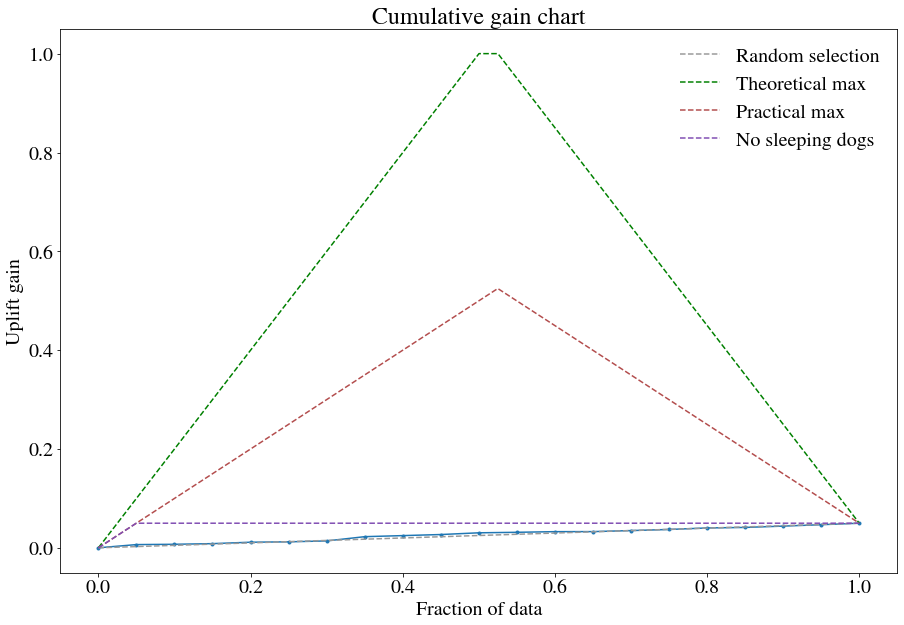

In [21]:
up.plot(show_theoretical_max = True, show_practical_max = True, show_no_dogs = True)

<AxesSubplot:title={'center':'Cumulative uplift curve'}, xlabel='Fraction of data', ylabel='Cumulative lift'>

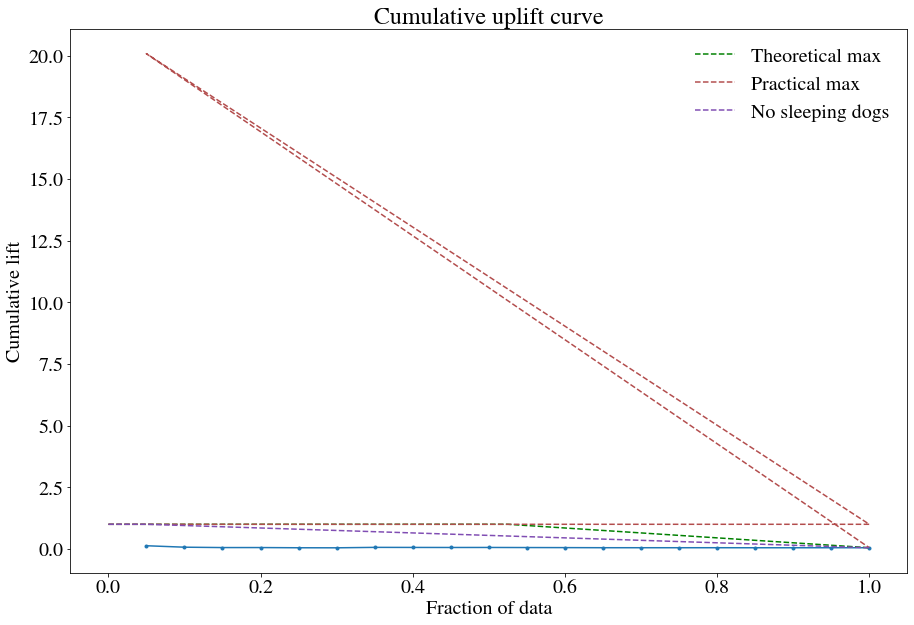

In [22]:
up.plot(plot_type = 'cuplift', show_theoretical_max = True, show_practical_max = True, show_no_dogs = True)

<AxesSubplot:title={'center':'Uplift curve'}, xlabel='Fraction of data', ylabel='Lift'>

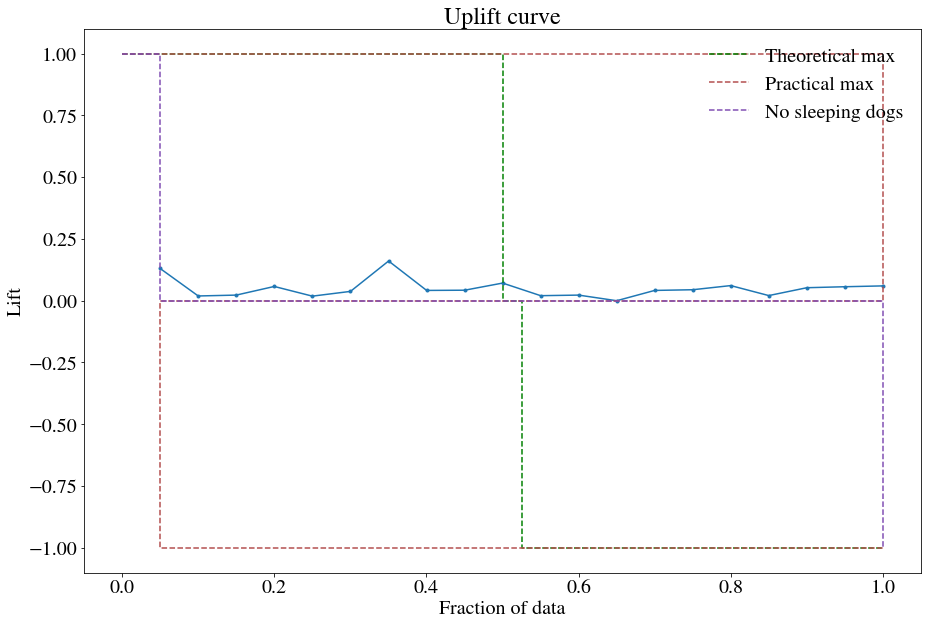

In [23]:
up.plot(plot_type='uplift', show_theoretical_max=True, show_practical_max=True, show_no_dogs=True)

<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

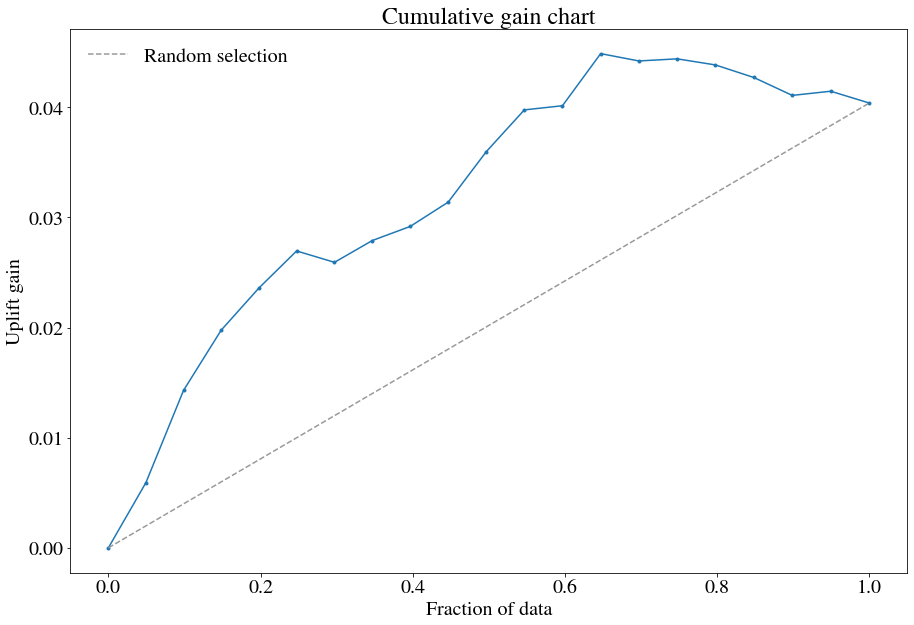

In [24]:
up.train_results_.plot()

In [25]:
up.test_results_.q1_aqini

0.0028548003407239194

# Using multiple scoring fucntions

In [26]:
 # Specify your dataframe, treatment column, and outcome column.
up = TransformedOutcome(
    df, 
    col_treatment = 'Treatment', 
    col_outcome = "Outcome",
    stratify = df["Treatment"],
    scoring_method = ["max_aqini", "qini", "aqini"],
    scoring_cutoff = 0.4
)

In [27]:
up.randomized_search(n_iter = 3, n_jobs = 1)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END colsample_bytree=0.6388163670381364, gamma=9.126648378434473, max_depth=2, min_child_weight=62, n_estimators=260, subsample=0.6416275268945661; aqini: (test=0.002) max_aqini: (test=0.022) qini: (test=0.007) total time=   0.3s
[CV 2/5] END colsample_bytree=0.6388163670381364, gamma=9.126648378434473, max_depth=2, min_child_weight=62, n_estimators=260, subsample=0.6416275268945661; aqini: (test=0.001) max_aqini: (test=0.016) qini: (test=-0.008) total time=   0.2s
[CV 3/5] END colsample_bytree=0.6388163670381364, gamma=9.126648378434473, max_depth=2, min_child_weight=62, n_estimators=260, subsample=0.6416275268945661; aqini: (test=0.001) max_aqini: (test=0.024) qini: (test=-0.006) total time=   0.2s
[CV 4/5] END colsample_bytree=0.6388163670381364, gamma=9.126648378434473, max_depth=2, min_child_weight=62, n_estimators=260, subsample=0.6416275268945661; aqini: (test=-0.000) max_aqini: (test=0.014) qini: (test=-0.000)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs...
                                        'min_child_weight': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                     

In [34]:
results = up.rand_search_.cv_results_
params = results['params']

result_dict = {'max_aqini': results['mean_test_max_aqini'], 
 'qini': results['mean_test_qini'],
 'aqini': results['mean_test_aqini']}
# 'aqini': results['mean_test_aqini']}

param_dict = {}
for scorer, res in result_dict.items():
    best_idx = np.argmax(res)
    param_dict[scorer] = params[best_idx]

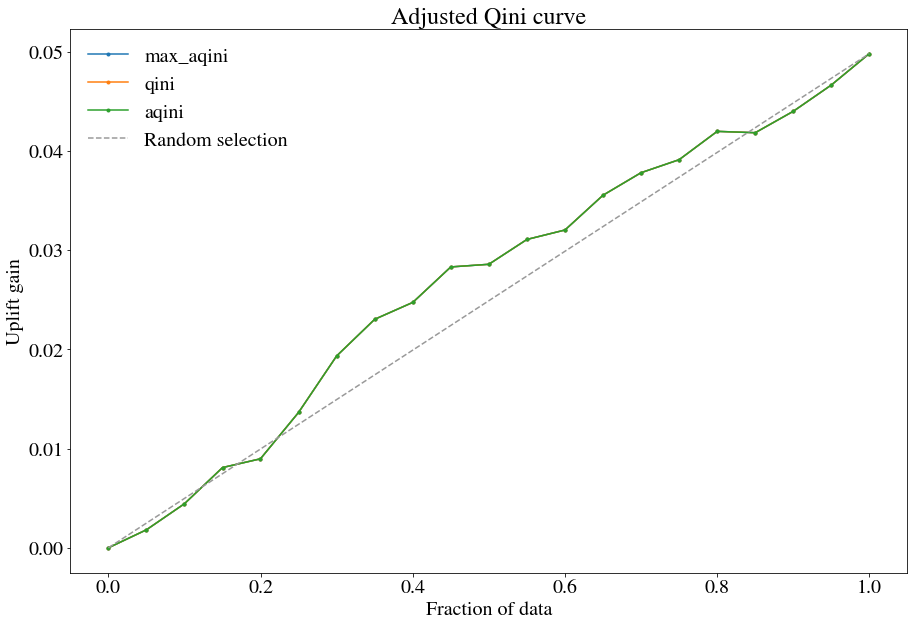

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
for keys in param_dict:
    up.fit(**param_dict[keys], nthread=30)
    up.plot(ax=ax, plot_type='aqini', label=keys, show_random_selection=keys=='aqini')

# Using a custom objective function

In [36]:
def fair_obj(dtrain, preds):
    """y = c * abs(x) - c * np.log(abs(abs(x) + c))"""
    x = preds - dtrain
    c = 1
    den = abs(x) + c
    treat = dtrain > 0
    cont = dtrain < 0
    
    grad = c*x / den
    hess = c*c / den ** 2
    return grad, hess

def huber_approx_obj(dtrain, preds):
    d = dtrain - preds  #remove .get_labels() for sklearn
    h = 1  #h is delta in the graphic
    scale = 1 + (d / h) ** 2
    scale_sqrt = np.sqrt(scale)
    grad = d / scale_sqrt
    hess = 1 / scale / scale_sqrt
    return grad, hess

def log_cosh_obj(dtrain, preds):
    x = preds - dtrain
    grad = np.tanh(x)
    hess = 1 / np.cosh(x)**2
    return grad, hess

In [37]:
upnew = TransformedOutcome(df, col_treatment = 'Treatment', col_outcome = 'Outcome', stratify = df["Treatment"], scoring_method = 'aqini', scoring_cutoff = 0.4)

In [38]:
# Using MAE as objective in XGB
from xgboost import XGBRegressor
upnew.randomized_search_params['estimator'] = XGBRegressor(objective= log_cosh_obj, nthread = 1)
upnew.randomized_search(n_iter = 10, verbose =3, n_jobs = 1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=0.46280851390335476, gamma=3.9457886770759387, max_depth=14, min_child_weight=355, n_estimators=351, subsample=0.849969697731157; total time=   0.2s
[CV 2/5] END colsample_bytree=0.46280851390335476, gamma=3.9457886770759387, max_depth=14, min_child_weight=355, n_estimators=351, subsample=0.849969697731157; total time=   0.2s
[CV 3/5] END colsample_bytree=0.46280851390335476, gamma=3.9457886770759387, max_depth=14, min_child_weight=355, n_estimators=351, subsample=0.849969697731157; total time=   0.2s
[CV 4/5] END colsample_bytree=0.46280851390335476, gamma=3.9457886770759387, max_depth=14, min_child_weight=355, n_estimators=351, subsample=0.849969697731157; total time=   0.2s
[CV 5/5] END colsample_bytree=0.46280851390335476, gamma=3.9457886770759387, max_depth=14, min_child_weight=355, n_estimators=351, subsample=0.849969697731157; total time=   0.2s
[CV 1/5] END colsample_bytree=0.839757347429

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs...
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2ee86419e8>,
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
           

In [39]:
upnew.fit(nthread = 50, **upnew.rand_search_.best_params_, objective = log_cosh_obj)

<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

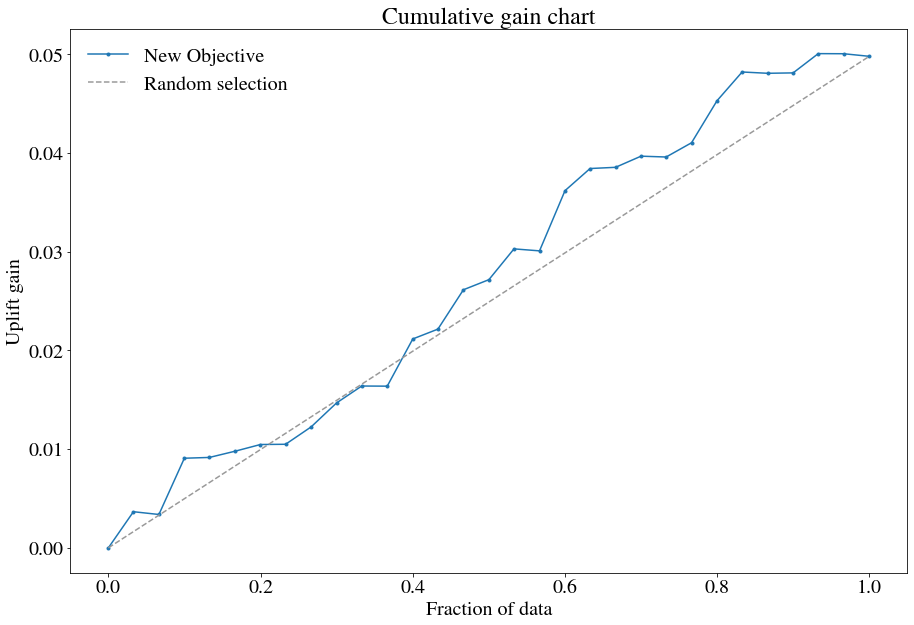

In [40]:
upnew.plot(label = 'New Objective', n_bins = 30)

# Using other models

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [43]:
up1 = TransformedOutcome(df, col_treatment = 'Treatment', col_outcome = 'Outcome', stratify=df['Treatment'],
                        sklearn_model = RandomForestRegressor)

In [44]:
up1.randomized_search(param_distributions = {'max_depth':range(1,100), 'min_samples_split':range(1,1000)}, 
                      n_iter=10,
                     n_jobs = 10)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=10,
                   param_distributions={'max_depth': range(1, 100),
                                        'min_samples_split': range(1, 1000)},
                   refit=False, scoring=make_scorer(_cgains_score), verbose=3)

In [45]:
up1.rand_search_.best_params_

{'min_samples_split': 866, 'max_depth': 7}

In [46]:
up1.fit(**up1.rand_search_.best_params_)

<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

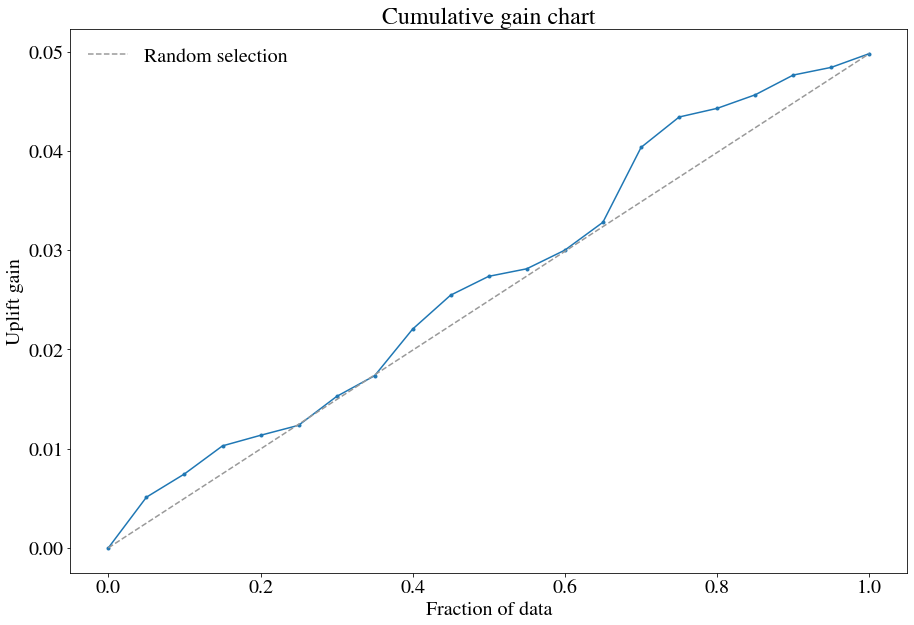

In [47]:
up1.plot()

In [48]:
up1.test_results_.q1_aqini

0.004431673596043122

In [49]:
up1.test_results_.q1_qini

0.01554908156947515

In [50]:
up.rand_search_

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs...
                                        'min_child_weight': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                     

Text(0.5, 0, 'Adjusted Qini score')

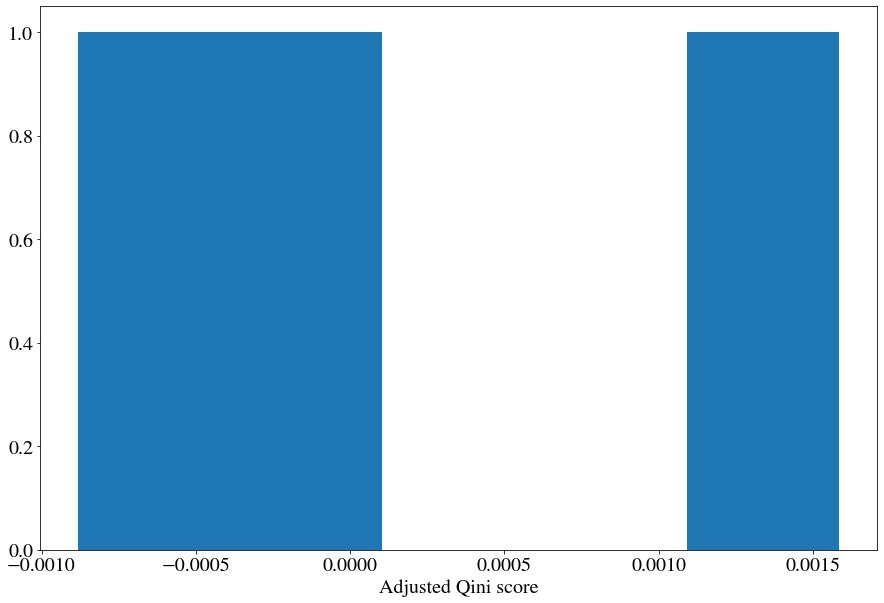

In [52]:
results = up.rand_search_.cv_results_
plt.figure(figsize = (15,10))
plt.hist(results['split0_test_aqini'], bins = 5)
plt.xlabel('Adjusted Qini score')

In [53]:
results

{'mean_fit_time': array([0.22359505, 0.13239536, 0.46239834]),
 'std_fit_time': array([0.01485072, 0.00442472, 0.01486359]),
 'mean_score_time': array([0.02128153, 0.01958909, 0.02279086]),
 'std_score_time': array([0.00121186, 0.00073259, 0.00068195]),
 'param_colsample_bytree': masked_array(data=[0.6388163670381364, 0.9423211003868577,
                    0.734469900681466],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[9.126648378434473, 8.543342728196674,
                    4.217809900643081],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[2, 10, 7],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[62, 275, 227],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators

In [54]:
ranges = list(range(1,500,10))
scores = []

for val in ranges:
    up.fit(n_estimators=val, nthread=4)
    scores.append(up.test_results_.q1_aqini)

Text(0, 0.5, 'Adjusted q1')

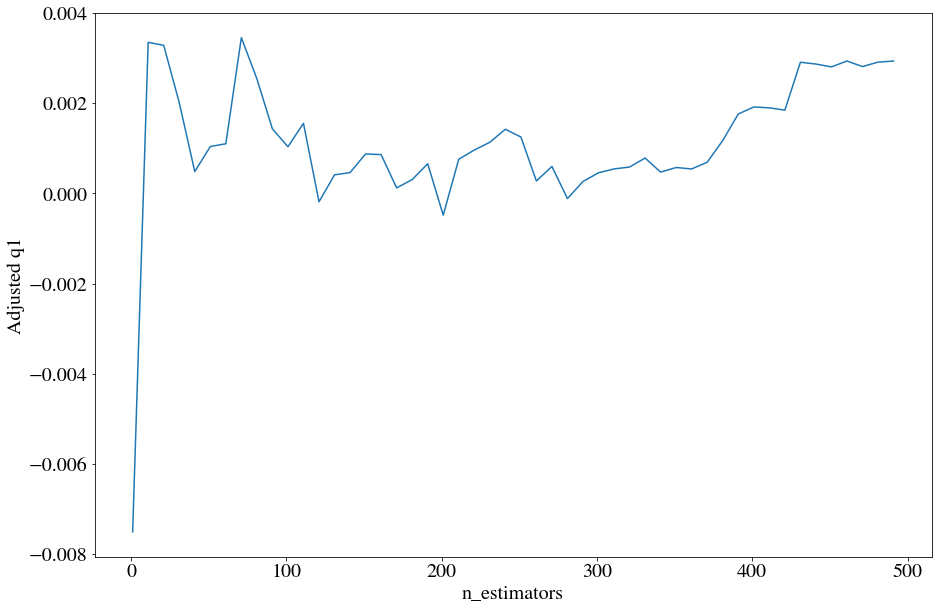

In [55]:
plt.figure(figsize=(15,10))
plt.plot(ranges, scores)

plt.xlabel('n_estimators')
plt.ylabel('Adjusted q1')

# Independent usage of evaluation metrics

In [56]:
from pylift.eval import UpliftEval

In [60]:
upev = UpliftEval(treatment = up.tc_test, 
                  outcome = up.y_test, 
                  prediction = up.transformed_y_test_pred)

<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

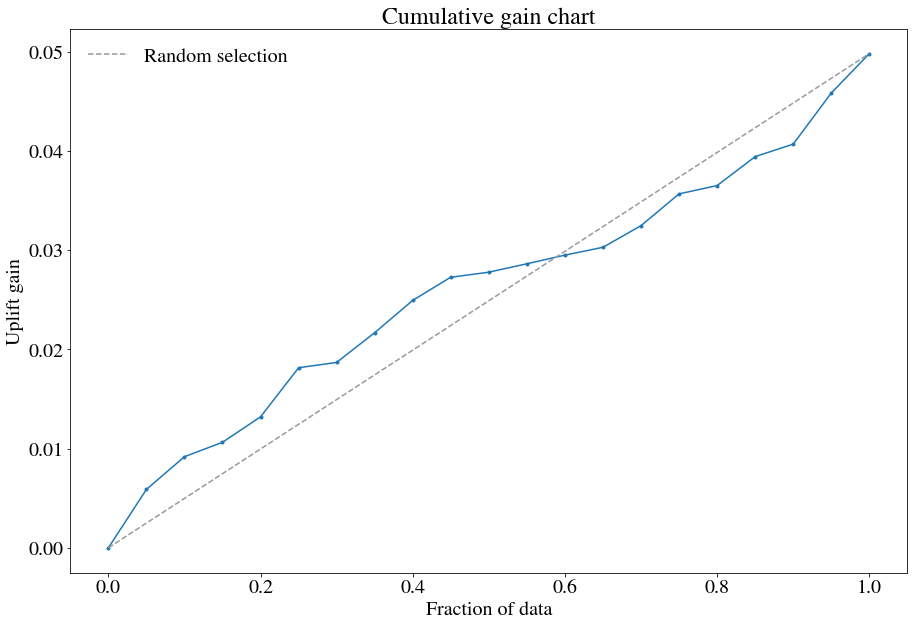

In [61]:
upev.plot()

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Treatment balance curve'}, xlabel='Fraction of data', ylabel='Treatment size / (treatment size + control size)'>

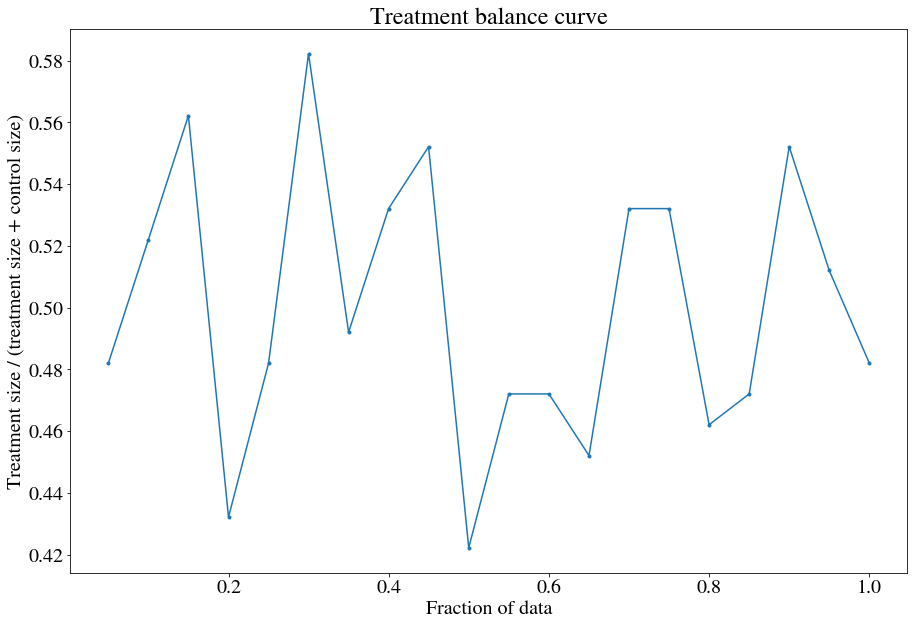

In [62]:
upev.plot(plot_type = 'balance')